In [1]:
# Importing all required packages and libraries
import pandas as pd, numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing bike data set into data frome to understand the data further
bikedata = pd.read_csv(r"C:\Personal\UpGrad\Materials\Linear_Regression\Assignment\day.csv")
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Based on Upgrade live session i have documented what are all the steps needs to be performed to build the model to identify below requirements
#Which variables are significant in predicting the demand for shared bikes.
#How well those variables describe the bike demands

In [5]:
# 1. Drop the index fields which are not going to contribute any significants in linear regreesion
# 2. Convert identified fields into categorical variables in this case (season, yr, month, holiday, weekend, wokringday,weathersit) using One-hot-encoding
# 3. Identify Continous features in our case looking at table data it will a temp, atemp, hum, windspeed
# 4. Divide teh data to train and test
# 5. Perform scaling (Normalization/Standardization)
# 6. Divide data into dependent and independant variables
# 7. Create linear regression model using (RFE & VIP/P-value)
# 8. Check the assumptions
# 9. Check adhustor R-Square for both train and test data
# 10. Report the final model

In [6]:
# As we could see following columns not going to make any significant instance, dtedat, causal and registered we will remove from the dataframe
print(bikedata.columns)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [7]:
bikedata.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [8]:
print(bikedata.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [9]:
bikedata.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [10]:
#By looking at this data set min, mas and mean will not make sense in this context since these are indicators not the values so we need to make them as categorical variables as explained in high level steps
# before that let's do few more check to ensure we got clean data set and does not have any empty rows or null columns

In [11]:
count=bikedata.isnull().sum()
print(count)

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [21]:
# it looks clean and we don't have any null values in columns

In [12]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [23]:
# Step 2 let's start converting these columns into categorical variables

In [13]:
# lets convert first season volumn we have total 4 season we can map them into each of the season since we compared those season variable vs dteday
bikedata['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bikedata.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [14]:
bikedata['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [33]:
# we could see call 4 categorcial data updated across all teh rows for season column

In [15]:
# Let's start chanding for week days we have 0 to 6 and o start from Sunday and ends at 6 as Saturday
bikedata['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bikedata.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [16]:
bikedata['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [38]:
# We have 2 distince values 1 is wokring day and 0 is nonworking day however based on weekday variable we will able to identify its working day or non working day so we don't need to disturb this colum for now

In [17]:
bikedata['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [18]:
# Refer the data dictionary to understand these values of 1, 2 and 3
bikedata['weathersit'].replace({1:"Clear_Cloud",2:"Mist_cloud",3:"Bad_Cloudy"},inplace=True)
bikedata.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Cloud,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Cloud,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloud,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloud,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Cloud,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Cloud,6.184153,7.54440,48.2917,14.958889,1321


In [19]:
bikedata.shape

(730, 12)

In [21]:
bikedata.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [22]:
bikedata['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [46]:
# year o means 2018, 1:2019

In [23]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


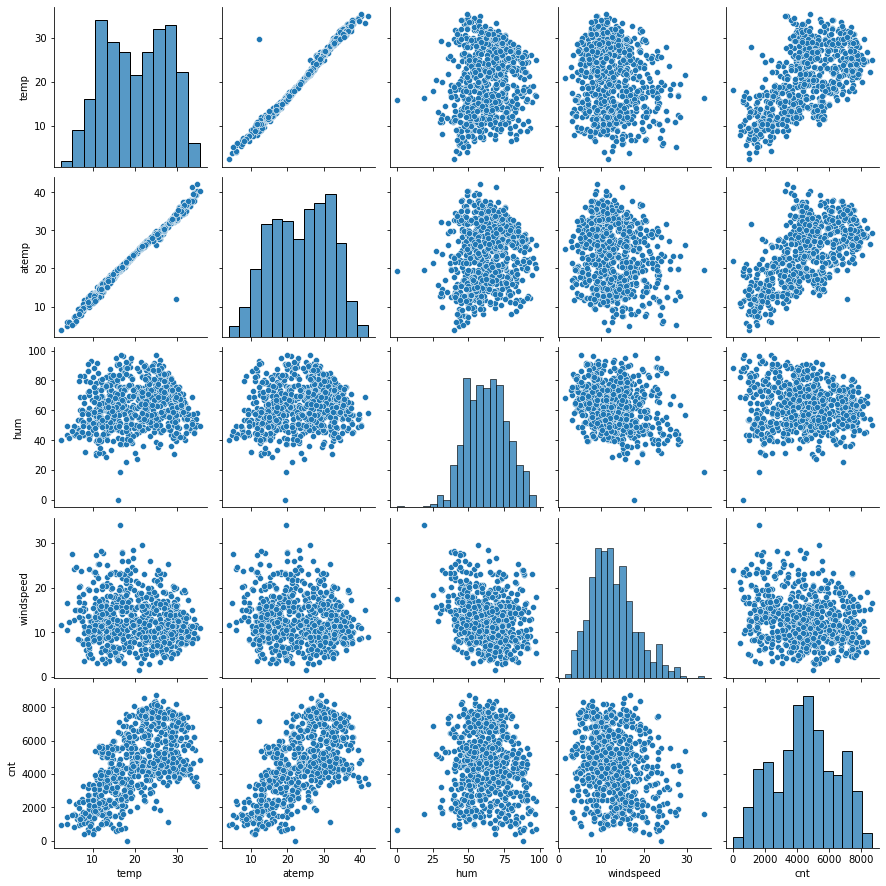

In [24]:
# Let's start performing the EDA to understand the relation between each of the variables and get some intial assessment to understand the data trend how its spread across
# Let's understand the numberical variables spreads using pair plot
# Bi-Variant Analysis
sns.pairplot(bikedata, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

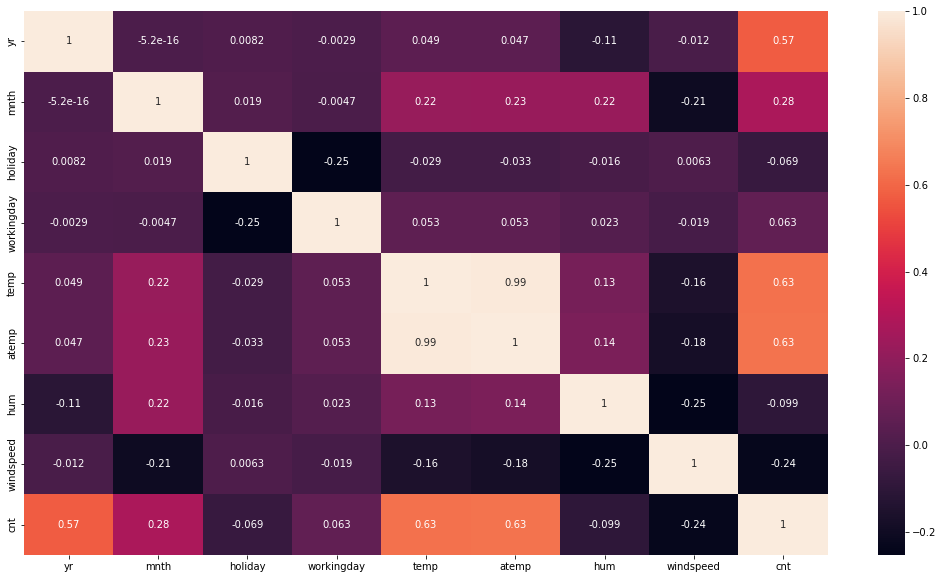

In [25]:
# If we closely look at outcome of above pairplt result we can say that temp and atemp have a relationship
#Now let check the correlation using heatmap
# Mutli Variant Analysis
plt.figure(figsize = (18, 10))
sns.heatmap(bikedata.corr(),annot = True)
plt.show()

In [51]:
# We could clearly see cnt vs windspead has negative corelation and cnt vs humidity has negative coorelation 
# count vs temp, atemp, working day has postive corelation and both looks same impact 0.63 so we can expect any analsis using both of these variable might result same trend
# count vs holiday has negative corelation
#count vs month not making much impact however we could see some postive corlation

<AxesSubplot:xlabel='season', ylabel='cnt'>

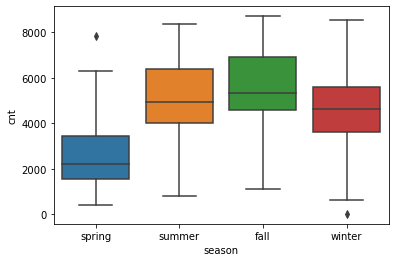

In [26]:
# Now let's start comparing non numeric Categorical variables with Count; let's take seaon first and we are using Univariant analysis

sns.boxplot(x = 'season', y = 'cnt', data = bikedata)

In [27]:
# We could see during Summer, Fall, Winter mean values between 5000 to 6000
# lets start do this comparison again rest of categorical variables

In [28]:
bikedata.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Cloud,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Cloud,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloud,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloud,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Cloud,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Cloud,6.184153,7.54440,48.2917,14.958889,1321


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

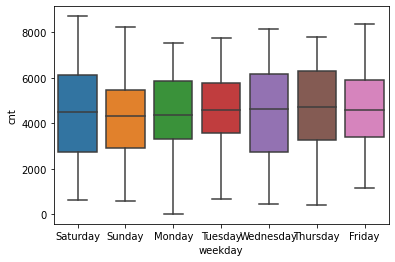

In [29]:
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedata)

In [59]:
# We could see Monday to Saturday count value are high and sunder we count value < 6000

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

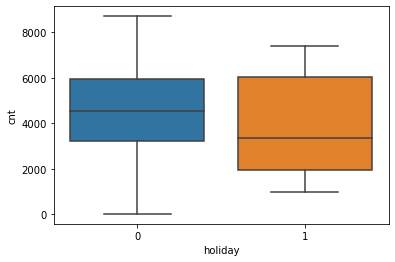

In [30]:
sns.boxplot(x = 'holiday', y = 'cnt', data = bikedata)

In [61]:
# Its very clear during Holiday the count has very low number and look at the gap between mean and 75 percentail its wide sprea

<AxesSubplot:xlabel='yr', ylabel='cnt'>

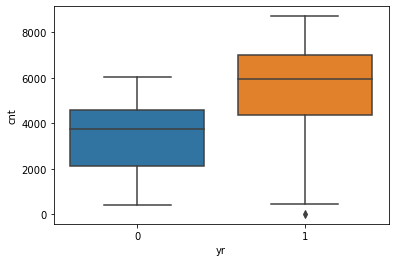

In [32]:
sns.boxplot(x = 'yr', y = 'cnt', data = bikedata)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

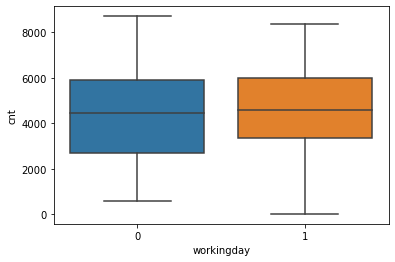

In [33]:
sns.boxplot(x = 'workingday', y = 'cnt', data = bikedata)

In [64]:
#We could see that working day vs holiday reflecting similar to Mondat to Saturday trend

In [34]:
#Let's introduce dummary variables to train our data 
# Converting categorical variable data type into object so that it will be easy for training the data
bikedata['mnth']=bikedata['mnth'].astype(object)
bikedata['season']=bikedata['season'].astype(object)
bikedata['weathersit']=bikedata['weathersit'].astype(object)
bikedata['weekday']=bikedata['weekday'].astype(object)
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [35]:
# Now Create dummy Variables

Season_dummy=pd.get_dummies(bikedata['season'],drop_first=True)
Weather_dummy=pd.get_dummies(bikedata['weathersit'],drop_first=True)
Weekday_dummy=pd.get_dummies(bikedata['weekday'],drop_first=True)
Month_dummy=pd.get_dummies(bikedata['mnth'],drop_first=True)

In [36]:
# Let's add those dummy variales with existing data frame columns
bikedata=pd.concat([bikedata,Season_dummy],axis=1)
bikedata=pd.concat([bikedata,Weather_dummy],axis=1)
bikedata=pd.concat([bikedata,Weekday_dummy],axis=1)
bikedata=pd.concat([bikedata,Month_dummy],axis=1)
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   hum          730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
 12  spring       730 non-null    uint8  
 13  summer       730 non-null    uint8  
 14  winter       730 non-null    uint8  
 15  Clear_Cloud  730 non-null    uint8  
 16  Mist_cloud   730 non-null    uint8  
 17  Monday       730 non-null    uint8  
 18  Saturday     730 non-null    uint8  
 19  Sunday  

In [37]:
# Since we have converted all categorical variable values into One-Hot_Encoding we can confidently remove original volumns to simplify the scaling and modelling
#Deleting the orginal columns season.weathersit,weekday,mnth
#Deleting the orginal columns season.weathersit,weekday,mnth
bikedata.drop(['season'],axis=1,inplace=True)
bikedata.drop(['weathersit'],axis=1,inplace=True)
bikedata.drop(['weekday'],axis=1,inplace=True)
bikedata.drop(['mnth'],axis=1,inplace=True)
bikedata.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
 # We could see all the categorical variable values has been added as colum and it can be used to implement One-hot-Encoding method

In [38]:
#Now we will start training the data by divinding the data and need to important very important package sklearn and train_test_split which is essence for training our data and building the model
from sklearn.model_selection import train_test_split

In [39]:
# Let's do simple step by creating X and Y variables and see the output
# here we will take Y as count and X we will use different variables to understand basictrend
# since we have total records only 700+ rows i will take 70:30 train and test data 
X = bikedata['season']
y = bikedata['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

KeyError: 'season'

In [78]:
X_train.head()

653    winter
576      fall
426    spring
728    spring
482    summer
Name: season, dtype: object

In [79]:
X = bikedata['mnth']
y = bikedata['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [80]:
X_train.head()

653    10
576     7
426     3
728    12
482     4
Name: mnth, dtype: object

In [81]:
X = bikedata['weekday']
y = bikedata['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [82]:
X_train.head()

653     Tuesday
576     Tuesday
426    Saturday
728      Sunday
482    Saturday
Name: weekday, dtype: object

In [83]:
# This data shows interestingly Sunday counts are > Saturday however we can't conclude without further deep diving into performing linear regression and building the model

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

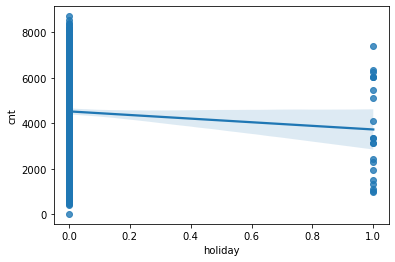

In [87]:
sns.regplot(x='holiday',y='cnt',data=bikedata)

In [85]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 45 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   hum          730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
 12  spring       730 non-null    uint8  
 13  summer       730 non-null    uint8  
 14  winter       730 non-null    uint8  
 15  Clear_Cloud  730 non-null    uint8  
 16  Mist_cloud   730 non-null    uint8  
 17  Monday       730 non-null    uint8  
 18  Saturday     730 non-null    uint8  
 19  Sunday  

<AxesSubplot:xlabel='yr', ylabel='cnt'>

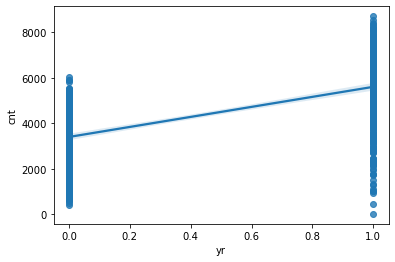

In [88]:
sns.regplot(x='yr',y='cnt',data=bikedata)

In [40]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bikedata, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,1,0,0,0,0,0,0,0,0


In [42]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [43]:
bike_train.columns

Index([         'yr',     'holiday',  'workingday',        'temp',
             'atemp',         'hum',   'windspeed',         'cnt',
            'spring',      'summer',      'winter', 'Clear_Cloud',
        'Mist_cloud',      'Monday',    'Saturday',      'Sunday',
          'Thursday',     'Tuesday',   'Wednesday',             2,
                   3,             4,             5,             6,
                   7,             8,             9,            10,
                  11,            12],
      dtype='object')

In [44]:
bike_test.columns

Index([         'yr',     'holiday',  'workingday',        'temp',
             'atemp',         'hum',   'windspeed',         'cnt',
            'spring',      'summer',      'winter', 'Clear_Cloud',
        'Mist_cloud',      'Monday',    'Saturday',      'Sunday',
          'Thursday',     'Tuesday',   'Wednesday',             2,
                   3,             4,             5,             6,
                   7,             8,             9,            10,
                  11,            12],
      dtype='object')

In [45]:
bike_test.shape

(219, 30)

In [46]:
bike_train.shape

(510, 30)

In [47]:
#Now we will use the numerical columns for scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [48]:
bikedata.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
num_vars=['atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [50]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,0.465255,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0.482973,0,1,...,0,1,0,0,0,0,0,0,0,0


In [51]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,7.431169,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# Now we will create x and y variable and keep count as Y variable and rest of columns as X variable
y_train = bike_train.pop('cnt')
X_train = bike_train

In [53]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [54]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [122]:
# Let's start the linear regression model to identify RFE and VIF/p-values
# for thqt we need to import all necessary packages

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           510 non-null    int64  
 1   holiday      510 non-null    int64  
 2   workingday   510 non-null    int64  
 3   temp         510 non-null    float64
 4   atemp        510 non-null    float64
 5   hum          510 non-null    float64
 6   windspeed    510 non-null    float64
 7   spring       510 non-null    uint8  
 8   summer       510 non-null    uint8  
 9   winter       510 non-null    uint8  
 10  Clear_Cloud  510 non-null    uint8  
 11  Mist_cloud   510 non-null    uint8  
 12  Monday       510 non-null    uint8  
 13  Saturday     510 non-null    uint8  
 14  Sunday       510 non-null    uint8  
 15  Thursday     510 non-null    uint8  
 16  Tuesday      510 non-null    uint8  
 17  Wednesday    510 non-null    uint8  
 18  2            510 non-null    uint8  
 19  3      

In [58]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [59]:
# Let's do feature selection using RFE method


lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 13),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('Clear_Cloud', True, 1),
 ('Mist_cloud', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 14),
 ('Tuesday', False, 10),
 ('Wednesday', False, 15),
 (2, False, 6),
 (3, False, 4),
 (4, True, 1),
 (5, True, 1),
 (6, False, 2),
 (7, False, 7),
 (8, False, 3),
 (9, True, 1),
 (10, False, 5),
 (11, False, 11),
 (12, False, 12)]

In [61]:
col = X_train.columns[rfe.support_]
col

Index([         'yr',     'holiday',  'workingday',       'atemp',
               'hum',   'windspeed',      'spring',      'winter',
       'Clear_Cloud',  'Mist_cloud',    'Saturday',      'Sunday',
                   4,             5,             9],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index([     'temp',    'summer',    'Monday',  'Thursday',   'Tuesday',
       'Wednesday',           2,           3,           6,           7,
                 8,          10,          11,          12],
      dtype='object')

In [63]:
X_train_rfe = X_train[col]

In [69]:
#Now we will start building the model usiing statusmodel package so that we can compare R-Square and VIF values

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [70]:
lml1 = sm.OLS(y_train,X_train_rfe1).fit()

In [71]:
print(lml1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.03e-185
Time:                        23:48:43   Log-Likelihood:                 503.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     495   BIC:                            -913.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0860      0.047      1.840      

In [72]:
# Let's derive VIF value usig our train data so that we can identify which are columns we can drop
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.72
2,atemp,18.40
7,Clear_Cloud,13.23
8,Mist_cloud,8.38
4,windspeed,4.53
5,spring,4.00
6,winter,2.83
0,yr,2.09
11,4,1.48
12,5,1.37


In [143]:
# We could see hum has high value of VIF which we can drop it safely

In [73]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [74]:
# Let's repeat this step until we see LOW VIF values
import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_rfe)
lml2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lml2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.47e-183
Time:                        23:50:00   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     496   BIC:                            -904.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0360      0.036     -1.012      

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Clear_Cloud,12.93
2,atemp,11.60
7,Mist_cloud,7.14
3,windspeed,4.53
4,spring,3.19
0,yr,2.08
5,winter,2.04
10,4,1.43
11,5,1.29
8,Saturday,1.23


In [76]:
# We could see atemp has very high VIF among others
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [77]:
import statsmodels.api as sm  
X_train_rfe3 = sm.add_constant(X_train_rfe)
lml3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lml3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          3.03e-151
Time:                        23:51:28   Log-Likelihood:                 416.29
No. Observations:                 510   AIC:                            -806.6
Df Residuals:                     497   BIC:                            -751.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2696      0.032      8.446      

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Clear_Cloud,4.48
2,windspeed,4.42
6,Mist_cloud,3.00
0,yr,2.03
3,spring,1.89
4,winter,1.69
9,4,1.32
10,5,1.29
7,Saturday,1.23
8,Sunday,1.22


In [79]:
# Let's drop windspeed since it has high VIF
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [81]:
import statsmodels.api as sm  
X_train_rfe4 = sm.add_constant(X_train_rfe)
lml4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lml4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     142.7
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          3.99e-146
Time:                        23:53:59   Log-Likelihood:                 401.53
No. Observations:                 510   AIC:                            -779.1
Df Residuals:                     498   BIC:                            -728.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2074      0.031      6.767      

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Clear_Cloud,3.19
5,Mist_cloud,2.35
0,yr,2.03
2,spring,1.78
3,winter,1.67
9,5,1.28
8,4,1.24
6,Saturday,1.23
7,Sunday,1.22
10,9,1.17


In [83]:
X_train_rfe=X_train_rfe.drop(['Clear_Cloud'],axis=1)

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.58
4,Mist_cloud,1.44
3,winter,1.35
2,spring,1.34
5,Saturday,1.17
6,Sunday,1.16
7,4,1.13
8,5,1.12
9,9,1.10
1,holiday,1.05


In [85]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lml5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lml5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     118.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          4.01e-125
Time:                        23:56:33   Log-Likelihood:                 349.19
No. Observations:                 510   AIC:                            -676.4
Df Residuals:                     499   BIC:                            -629.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5102      0.013     40.303      0.0

In [86]:
# Residual Analysis
y_train_pred = lml5.predict(X_train_rfe5)
res = (y_train - y_train_pred)

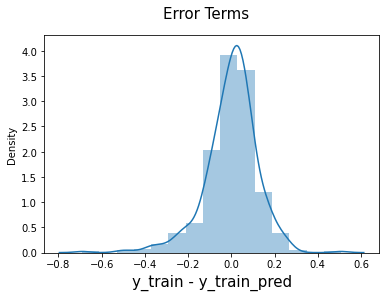

In [87]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [88]:
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [89]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lml6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lml6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     132.3
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          3.48e-126
Time:                        23:58:05   Log-Likelihood:                 349.16
No. Observations:                 510   AIC:                            -678.3
Df Residuals:                     500   BIC:                            -636.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5109      0.012     41.586      0.0

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.57
4,Mist_cloud,1.44
3,winter,1.31
2,spring,1.30
5,Sunday,1.14
6,4,1.12
7,5,1.12
8,9,1.09
1,holiday,1.04


In [91]:
X_train_rfe6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   yr          510 non-null    int64  
 2   holiday     510 non-null    int64  
 3   spring      510 non-null    uint8  
 4   winter      510 non-null    uint8  
 5   Mist_cloud  510 non-null    uint8  
 6   Sunday      510 non-null    uint8  
 7   4           510 non-null    uint8  
 8   5           510 non-null    uint8  
 9   9           510 non-null    uint8  
dtypes: float64(1), int64(2), uint8(7)
memory usage: 19.4 KB


In [92]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lml7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lml7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     132.3
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          3.48e-126
Time:                        23:59:09   Log-Likelihood:                 349.16
No. Observations:                 510   AIC:                            -678.3
Df Residuals:                     500   BIC:                            -636.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5109      0.012     41.586      0.0

In [93]:
y_train_cnt = lml7.predict(X_train_rfe7)

In [94]:
num_vars=['atemp','hum','windspeed','cnt']
bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])

In [95]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [96]:
X_train_new=X_train_rfe7.drop(['const'], axis=1)

In [97]:
# Now we can predict the trend using our model.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [98]:
X_train_rfe7.columns

Index(['const', 'yr', 'holiday', 'spring', 'winter', 'Mist_cloud', 'Sunday', 4,
       5, 9],
      dtype='object')

In [99]:
y_pred = lml7.predict(X_test_new)

In [100]:
# We will get error if we dont drop all high value VIF variables and the data set size must match with predict 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [101]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.12911728442051307

In [102]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7060691143657624

In [ ]:
#We can see that the equation for best fitted line is:
# We can see the demand for bikes depends mainly on below attributes:
#yr , holiday ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,3 ,4,5 ,6, 8, 9, sunday, 7, 10


#Final recommendations for the company:
# Demand is higher in month of 3,4, 5 , 6, 8, 9 ,7 and 10
# Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy, Sunday